# 遗传算法 
种群规模（P,population size）：即种群中染色体个体的数目。           
字符串长度（l, string length）：个体中染色体的长度。            
交配概率（pc, probability of performing crossover）：控制着交配算子的使用频率。交配操作可以加快收敛，使解达到最有希望的最佳解区域，因此一般取较大的交配概率，但交配概率太高也可能导致过早收敛，则称为早熟。         
突变概率（pm, probability of mutation）：控制着突变算子的使用频率。         
中止条件（termination criteria）            
在下面这个代码中，初始染色体随机生成，解码采用的是线性化            

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fitness_func(X):
    # 目标函数，即适应度值，X是种群的表现型
    a = 10
    pi = np.pi
    x = X[:, 0]
    y = X[:, 1]
    return 2 * a + x ** 2 - a * np.cos(2 * pi * x) + y ** 2 - a * np.cos(2 * 3.14 * y)


def decode(x, a, b):
    """解码，即基因型到表现型"""
    xt = 0
    for i in range(len(x)):
        xt = xt + x[i] * np.power(2, i)
    return a + xt * (b - a) / (np.power(2, len(x)) - 1)

def decode_X(X: np.array):
    """对整个种群的基因解码，上面的decode是对某个染色体的某个变量进行解码"""
    X2 = np.zeros((X.shape[0], 2))
    for i in range(X.shape[0]):
        xi = decode(X[i, :20], -5, 5)
        yi = decode(X[i, 20:], -5, 5)
        X2[i, :] = np.array([xi, yi])
    return X2

def select(X, fitness):
    """根据轮盘赌法选择优秀个体"""
    fitness = 1 / fitness  # fitness越小表示越优秀，被选中的概率越大，做 1/fitness 处理
    fitness = fitness / fitness.sum()  # 归一化
    idx = np.array(list(range(X.shape[0])))
    X2_idx = np.random.choice(idx, size=X.shape[0], p=fitness)  # 根据概率选择
    X2 = X[X2_idx, :]
    return X2

def crossover(X, c):
    """按顺序选择2个个体以概率c进行交叉操作"""
    for i in range(0, X.shape[0], 2):
        xa = X[i, :]
        xb = X[i + 1, :]
        for j in range(X.shape[1]):
            # 产生0-1区间的均匀分布随机数，判断是否需要进行交叉替换
            if np.random.rand() <= c:
                xa[j], xb[j] = xb[j], xa[j]
        X[i, :] = xa
        X[i + 1, :] = xb
    return X

def mutation(X, m):
    """变异操作"""
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if np.random.rand() <= m:
                X[i, j] = (X[i, j] + 1) % 2
    return X

def ga():
    """遗传算法主函数"""
    c = 0.3  # 交叉概率
    m = 0.05  # 变异概率
    best_fitness = []  # 记录每次迭代的效果
    best_xy = []
    iter_num = 100  # 最大迭代次数
    X0 = np.random.randint(0, 2, (50, 40))  # 随机初始化种群，为50*40的0-1矩阵
    for i in range(iter_num):
        #print('XO', X0.shape)
        X1 = decode_X(X0)  # 染色体解码
        #print('X1', X1.shape)
        fitness = fitness_func(X1)  # 计算个体适应度
        X2 = select(X0, fitness)  # 选择操作
        X3 = crossover(X2, c)  # 交叉操作
        X4 = mutation(X3, m)  # 变异操作
        # 计算一轮迭代的效果
        X5 = decode_X(X4)
        fitness = fitness_func(X5)
        best_fitness.append(fitness.min())
        x, y = X5[fitness.argmin()]
        best_xy.append((x, y))
        X0 = X4
    # 多次迭代后的最终效果
    print("最优值是：%.5f" % best_fitness[-1])

    print("最优解是：x=%.5f, y=%.5f" % best_xy[-1])
    # 最优值是：0.00000
    # 最优解是：x=0.00000, y=-0.00000
    # 打印效果
    plt.plot(best_fitness, color='r')
ga()

# Geatpy 进化算法库
Chrom:种群染色体矩阵，没一个元素代表一个基因，种群的个体数用Nind来命名      
Phen:种群表现型矩阵，没一个元素表示一个变量         
ObjV：目标函数矩阵，单目标一列，多目标独立额        
FitV：个体适应度，可行解为一，不可行解为0   
FieldDR:区域描述器          
trace:进化追踪器            
NDSet：全局最优解           

# 求解约束问题

gen|  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
----------------------------------------------------------------------------------
150| 15100  | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 0.00000E+00 
151| 15200  | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 0.00000E+00 
152| 15300  | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 0.00000E+00 
153| 15400  | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 0.00000E+00 
154| 15500  | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 2.07762E+00 | 0.00000E+00 
155| 15600  | 2.07762E+00 | 2.07762E+00 | 2.03277E+00 | 1.98792E+00 | 4.48527E-02 
156| 15700  | 2.12883E+00 | 2.12883E+00 | 1.95274E+00 | 1.61659E+00 | 2.00524E-01 
157| 15800  | 2.23280E+00 | 2.23280E+00 | 2.00068E+00 | 1.61659E+00 | 1.79319E-01 
158| 15900  | 2.23280E+00 | 2.23280E+00 | 1.99303E+00 | 1.61659E+00 | 1.67661E-01 
159| 16000  | 2.23280E+00 | 2.23280E+00 | 1.99424E+00 | 1.61659E+00 | 1.46968E-01 
160|

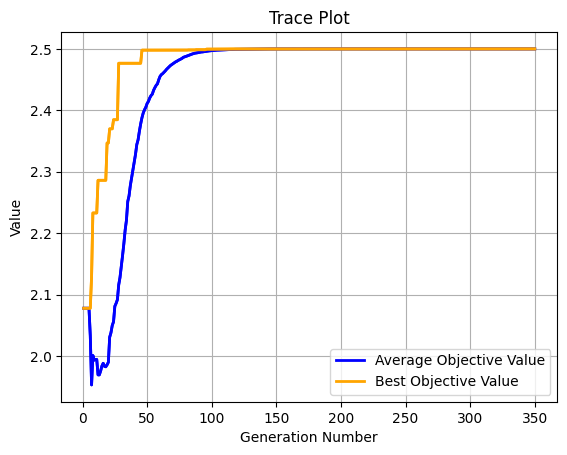

评价次数：50000
时间已过 0.14208507537841797 秒
最优的目标函数值为：2.4999999999937743
最优的控制变量值为：
0.4999999999967094
3.64599907041725e-12
0.4999999999996446


In [1]:
# -*- coding: utf-8 -*-
"""MyProblem.py"""
import numpy as np
import geatpy as ea

"""
    该案例展示了一个带等式约束的连续型决策变量最大化目标的单目标优化问题。
    该函数存在多个欺骗性很强的局部最优点。
    max f = 4*x1 + 2*x2 + x3
    s.t.
    2*x1 + x2 - 1 <= 0
    x1 + 2*x3 - 2 <= 0
    x1 + x2 + x3 - 1 == 0
    0 <= x1,x2 <= 1
    0 < x3 < 2
"""


class MyProblem(ea.Problem):  # 继承Problem父类
    def __init__(self):
        name = 'MyProblem'  # 初始化name（函数名称，可以随意设置）
        M = 1  # 初始化M（目标维数）
        maxormins = [-1]  # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 3  # 初始化Dim（决策变量维数）
        varTypes = [0] * Dim  # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [0, 0, 0]  # 决策变量下界
        ub = [1, 1, 2]  # 决策变量上界
        lbin = [1, 1, 0]  # 决策变量下边界（0表示不包含该变量的下边界，1表示包含）
        ubin = [1, 1, 0]  # 决策变量上边界（0表示不包含该变量的上边界，1表示包含）
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    def aimFunc(self, pop):  # 目标函数
        Vars = pop.Phen  # 得到决策变量矩阵
        x1 = Vars[:, [0]]
        x2 = Vars[:, [1]]
        x3 = Vars[:, [2]]
        pop.ObjV = 4 * x1 + 2 * x2 + x3  # 计算目标函数值，赋值给pop种群对象的ObjV属性
        # 采用可行性法则处理约束
        pop.CV = np.hstack([2 * x1 + x2 - 1,
                            x1 + 2 * x3 - 2,
                            np.abs(x1 + x2 + x3 - 1)])

    def calReferObjV(self):  # 设定目标数参考值（本问题目标函数参考值设定为理论最优值）
        referenceObjV = np.array([[2.5]])
        return referenceObjV
if __name__ == '__main__':
    """================================实例化问题对象==========================="""
    problem = MyProblem()  # 生成问题对象
    """==================================种群设置=============================="""
    Encoding = 'RI'  # 编码方式
    NIND = 100  # 种群规模
    Field = ea.crtfld(Encoding, problem.varTypes, problem.ranges, problem.borders)  # 创建区域描述器
    population = ea.Population(Encoding, Field, NIND)  # 实例化种群对象（此时种群还没被初始化，仅仅是完成种群对象的实例化）
    """================================算法参数设置============================="""
    myAlgorithm = ea.soea_DE_rand_1_bin_templet(problem, population)  # 实例化一个算法模板对象
    myAlgorithm.MAXGEN = 500  # 最大进化代数
    myAlgorithm.mutOper.F = 0.5  # 差分进化中的参数F
    myAlgorithm.recOper.XOVR = 0.7  # 重组概率
    myAlgorithm.logTras = 1  # 设置每隔多少代记录日志，若设置成0则表示不记录日志
    myAlgorithm.verbose = True  # 设置是否打印输出日志信息
    myAlgorithm.drawing = 1  # 设置绘图方式（0：不绘图；1：绘制结果图；2：绘制目标空间过程动画；3：绘制决策空间过程动画）
    """===========================调用算法模板进行种群进化========================"""
    [BestIndi, population] = myAlgorithm.run()  # 执行算法模板，得到最优个体以及最后一代种群
    # BestIndi.save()  # 把最优个体的信息保存到文件中
    """==================================输出结果=============================="""
    print('评价次数：%s' % myAlgorithm.evalsNum)
    print('时间已过 %s 秒' % myAlgorithm.passTime)
    if BestIndi.sizes != 0:
        print('最优的目标函数值为：%s' % BestIndi.ObjV[0][0])
        print('最优的控制变量值为：')
        for i in range(BestIndi.Phen.shape[1]):
            print(BestIndi.Phen[0, i])
    else:
        print('没找到可行解。')

# 多目标优化

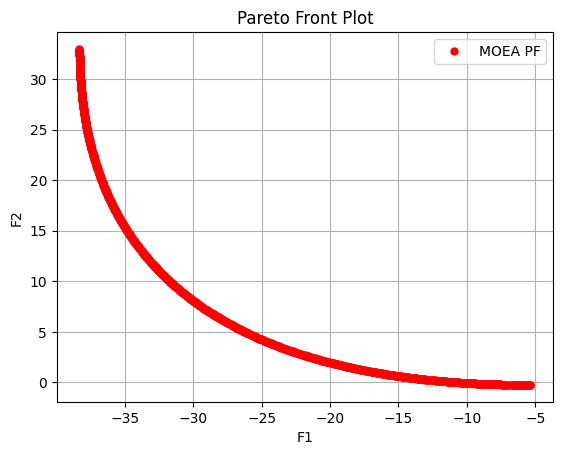

Execution time: 0.33887553215026855 s
Evaluation number: 100000
The number of non-dominated solutions is: 1000
hv: 0.84384
spacing: 0.02820


In [6]:
# -*- coding: utf-8 -*-
import numpy as np
import geatpy as ea
"""
问题类定义
"""
class MyProblem(ea.Problem): # 继承Problem父类
    def __init__(self):
        name = 'MyProblem' # 初始化name（函数名称，可以随意设置）
        M = 2 # 初始化M（目标维数）
        maxormins = [1] * M # 初始化maxormins（目标最小最大化标记列表，1：最小化该目标；-1：最大化该目标）
        Dim = 2 # 初始化Dim（决策变量维数）
        varTypes = [0] * Dim # 初始化varTypes（决策变量的类型，元素为0表示对应的变量是连续的；1表示是离散的）
        lb = [-5] * Dim # 决策变量下界
        ub = [5] * Dim # 决策变量上界
        lbin = [1] * Dim # 决策变量下边界
        ubin = [1] * Dim # 决策变量上边界
        # 调用父类构造方法完成实例化
        ea.Problem.__init__(self, name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)
    def aimFunc(self, pop): # 目标函数
        x1 = pop.Phen[:, [0]]
        x2 = pop.Phen[:, [1]]
        pop.ObjV = np.zeros((pop.Phen.shape[0], self.M))
        pop.ObjV[:,[0]] = x1**4-10*x1**2+x1*x2+x2**4-x1**2*x2**2
        pop.ObjV[:,[1]] = x2**4-x1**2*x2**2+x1**4+x1*x2
"""
执行脚本
"""
if __name__ == '__main__':
    problem = MyProblem()  # 生成问题对象
    # 构建算法
    algorithm = ea.moea_NSGA2_templet(problem,
                                      ea.Population(Encoding='RI', NIND=1000),
                                      MAXGEN=100,  # 最大进化代数。
                                      logTras=0)  # 表示每隔多少代记录一次日志信息，0表示不记录。
    # 求解
    res = ea.optimize(algorithm, verbose=False, drawing=1, outputMsg=True, drawLog=False, saveFlag=False, dirName='result')